In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 基于块匹配算法的视差计算
def block_matching(left_gray, right_gray, block_size, disparity_range):

    # 初始化
    height, width = left_gray.shape
    disparity_map = np.zeros_like(left_gray, dtype=np.float32)

    # 计算块中心到边缘的距离
    half_block = block_size // 2

    for y in range(half_block, height - half_block):
        for x in range(half_block, width - half_block):
            # 初始化
            best_offset = 0
            min_ssd = float('inf')
            left_block = left_gray[y - half_block:y + half_block + 1, x - half_block:x + half_block + 1]

            # 在右图像中搜索最佳匹配的像素列
            for offset in range(disparity_range):
                if x - half_block - offset < 0:
                    break

                # 获取右图像中当前偏移量对应的像素块
                right_block = right_gray[y - half_block:y + half_block + 1, x - half_block - offset:x + half_block + 1 - offset]

                # 计算两个像素块之间的 SSD 误差
                ssd = np.sum((left_block - right_block) ** 2)

                # 更新最小 SSD 和最佳视差值
                if ssd < min_ssd:
                    min_ssd = ssd
                    best_offset = offset

            disparity_map[y, x] = best_offset

    return disparity_map

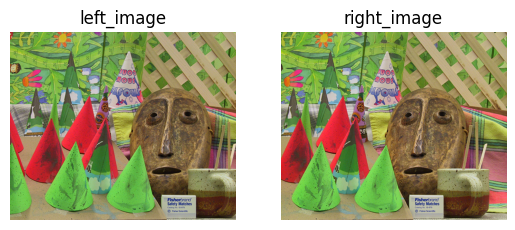

In [6]:
left_image = cv2.imread('data/left2.png')
right_image = cv2.imread('data/right2.png')

# 创建子图，显示第一张图片
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('left_image')

# 创建子图，显示第二张图片
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('right_image')

# 显示图片
plt.show()



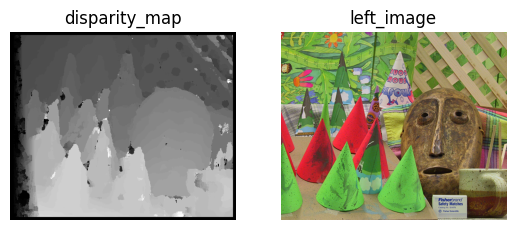

In [7]:
left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# 设置参数：匹配块大小和视差范围
block_size = 13 
disparity_range = 64

# 计算视差图
disparity_map = block_matching(left_gray, right_gray, block_size, disparity_range)

# 创建子图，显示第一张图片
plt.subplot(1, 2, 1)
plt.imshow(disparity_map, cmap='gray')
plt.title('disparity_map')
plt.axis('off') 

# 创建子图，显示第二张图片
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('left_image')

# 显示图片
plt.show()
